### Exploratory Data Analysis - Marathon Records

This dataset is made up of 7,4 million records of marathons around the world. For this project marathons developed in the U.S. were taken into account.

 - Modules and Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Check the existence of the file which will be used

In [2]:
path = os.getcwd()
files = os.listdir(path)
for file in files:
    print (file)

.ipynb_checkpoints
archive
EDA_Marathon.ipynb
sourceLink.txt
TWO_CENTURIES_OF_UM_RACES.csv


- Load _.csv file_ and Set it a variable

In [3]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\Fernanda\AppData\Local\Temp\ipykernel_21484\107228863.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


- DataFrame Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


In [5]:
df.shape

(7461195, 13)

- Data Understanding

In [6]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


### Data Preparation

#### _Clean up data_

 - Rename columns

In [7]:
df = df.rename(columns = {'Year of event': 'Year_of_event',                         
                          'Event dates':'Event_dates',                          
                          'Event name':'Event_name', 
                          'Event distance/length':'Event_distance',
                          'Event number of finishers':'Event_number_of_finishers', 
                          'Athlete performance':'Athlete_performance', 
                          'Athlete club':'Athlete_club',
                          'Athlete country':'Athlete_country',
                          'Athlete year of birth':'Athlete_year_of_birth',
                          'Athlete gender':'Athlete_gender',
                          'Athlete age category':'Athlete_age_category',
                          'Athlete average speed':'Athlete_average_speed',
                          'Athlete ID':'Athlete_ID',
                         })

In [8]:
df.columns

Index(['Year_of_event', 'Event_dates', 'Event_name', 'Event_distance',
       'Event_number_of_finishers', 'Athlete_performance', 'Athlete_club',
       'Athlete_country', 'Athlete_year_of_birth', 'Athlete_gender',
       'Athlete_age_category', 'Athlete_average_speed', 'Athlete_ID'],
      dtype='object')

Subset relevant columns:

- Event distance/length: 50km, 50mi


In [9]:
df['Event_distance'].unique()

array(['50km', '6h', '63.9km', ..., '2925.7mi/64Etappen',
       '355km/5Etappen', '2906.1mi/64Etappen'], dtype=object)

In [10]:
df[df['Event_distance'].isin(['50km', '50mi'])]

,Year_of_event,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_performance,Athlete_club,Athlete_country,Athlete_year_of_birth,Athlete_gender,Athlete_age_category,Athlete_average_speed,Athlete_ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


- Year of event: 2020
- Event distance/length: 50km, 50mi

In [11]:
df[(df['Event_distance'].isin(['50km', '50mi']))&(df['Year_of_event']==2020)]

,Year_of_event,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_performance,Athlete_club,Athlete_country,Athlete_year_of_birth,Athlete_gender,Athlete_age_category,Athlete_average_speed,Athlete_ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


- Event country: USA

In [12]:
df['Event_name'].unique()

array(['Selva Costera (CHI)',
       '6 Stunden Self-Transcendence Sri Chinmoy Smolensk (RUS)',
       'Knap Trail - Forhajerska (SLO)', ...,
       'Centenary Lakes 6 Hour Track Run - 50km Split (AUS)',
       'Centenary Lakes 50 Km Track Run (AUS)',
       'Szombathely 24 hours running Race  (HUN)'], dtype=object)

In [13]:
#Method 01
# df = df.query("Event_name.str.contains('USA', case=False)")
#Method 02
#df.loc[df["Event_name"].str.contains("USA")]
#Method 03 --> This works. 01 and 02 did not work
df[df['Event_name'].str.split('(').str.get(1).str.split(')').str.get(0)== 'USA']

,Year_of_event,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_performance,Athlete_club,Athlete_country,Athlete_year_of_birth,Athlete_gender,Athlete_age_category,Athlete_average_speed,Athlete_ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


- Combine all filters

In [14]:

df2 = df[(df['Event_distance'].isin(['50km', '50mi']))&(df['Year_of_event']==2020)&(df['Event_name'].str.split('(').str.get(1).str.split(')').str.get(0)== 'USA')]

In [15]:
df.head()

,Year_of_event,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_performance,Athlete_club,Athlete_country,Athlete_year_of_birth,Athlete_gender,Athlete_age_category,Athlete_average_speed,Athlete_ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [16]:
df2.shape

(26090, 13)

- Clean up `Athlete age`

In [17]:
df2['Athlete_age'] = 2020 - df2['Athlete_year_of_birth']

C:\Users\Fernanda\AppData\Local\Temp\ipykernel_21484\3749433203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete_age'] = 2020 - df2['Athlete_year_of_birth']


- Remove **h** from `[Athlete_performance]`

In [18]:
df2['Athlete_performance']=df2['Athlete_performance'].str.split(' ').str.get(0)

C:\Users\Fernanda\AppData\Local\Temp\ipykernel_21484\3300141303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete_performance']=df2['Athlete_performance'].str.split(' ').str.get(0)


In [19]:
df2.head()

,Year_of_event,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_performance,Athlete_club,Athlete_country,Athlete_year_of_birth,Athlete_gender,Athlete_age_category,Athlete_average_speed,Athlete_ID,Athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


- Drop Columns: `Athlete_club`, `Athlete_country`, `Athlete_year_of_birth`, `Athlete_age_category`

<!-- 'Year_of_event', 'Event_dates', 'Event_name', 'Event_distance',
       'Event_number_of_finishers', 'Athlete_performance', 'Athlete_club',
       'Athlete_country', 'Athlete_year_of_birth', 'Athlete_gender',
       'Athlete_age_category', 'Athlete_average_speed', 'Athlete_ID' -->

In [20]:
df2 = df2.drop(['Athlete_club', 'Athlete_country', 'Athlete_year_of_birth', 'Athlete_age_category'], axis = 1)

In [21]:
df2.head()

,Year_of_event,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_performance,Athlete_gender,Athlete_average_speed,Athlete_ID,Athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34,M,11.212,810281,43.0


- Clean up `null values`

In [22]:
df2.isna().sum()

Year_of_event                  0
Event_dates                    0
Event_name                     0
Event_distance                 0
Event_number_of_finishers      0
Athlete_performance            0
Athlete_gender                 0
Athlete_average_speed          0
Athlete_ID                     0
Athlete_age                  233
dtype: int64

In [23]:
df2[df2['Athlete_age'].isna()==1]

,Year_of_event,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_performance,Athlete_gender,Athlete_average_speed,Athlete_ID,Athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km (USA),50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km (USA),50km,8,8:31:26,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race (USA),50mi,27,11:55:05,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race (USA),50mi,23,9:03:25,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race (USA),50mi,23,10:37:00,M,7.579,398583,NaN


In [24]:
df2 = df2.dropna()

In [25]:
df2.shape

(25857, 10)

- Check for dupes

In [26]:
df2[df2.duplicated()==True]

,Year_of_event,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_performance,Athlete_gender,Athlete_average_speed,Athlete_ID,Athlete_age


- Reset Index

In [27]:
df2.reset_index(drop=True)

,Year_of_event,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_performance,Athlete_gender,Athlete_average_speed,Athlete_ID,Athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34,M,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48,F,7.013,816361,62.0
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22,F,6.706,326469,43.0
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24,F,6.705,372174,58.0
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30,F,6.543,860349,39.0


- Fix types

In [28]:
df2.dtypes

Year_of_event                  int64
Event_dates                   object
Event_name                    object
Event_distance                object
Event_number_of_finishers      int64
Athlete_performance           object
Athlete_gender                object
Athlete_average_speed         object
Athlete_ID                     int64
Athlete_age                  float64
dtype: object

In [29]:
df2['Athlete_age'] = df2['Athlete_age'].astype(int)

In [30]:
df2['Athlete_average_speed'] = df2['Athlete_average_speed'].astype(float)

In [31]:
df2.dtypes

Year_of_event                  int64
Event_dates                   object
Event_name                    object
Event_distance                object
Event_number_of_finishers      int64
Athlete_performance           object
Athlete_gender                object
Athlete_average_speed        float64
Athlete_ID                     int64
Athlete_age                    int32
dtype: object

- Reorder columns

In [32]:
df3 = df2[['Event_dates','Event_name', 'Event_distance', 'Event_number_of_finishers', 'Athlete_ID', 'Athlete_gender', 'Athlete_age', 'Athlete_performance', 'Athlete_average_speed', 'Year_of_event']]

In [33]:
df3.head()

,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_ID,Athlete_gender,Athlete_age,Athlete_performance,Athlete_average_speed,Year_of_event
2539945,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,71287,M,29,3:17:55,15.158,2020
2539946,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,629508,M,39,4:02:32,12.369,2020
2539947,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,64838,M,21,4:07:57,12.099,2020
2539948,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,704450,M,37,4:22:02,11.449,2020
2539949,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,810281,M,43,4:27:34,11.212,2020


In [34]:
df3[df3['Event_name']=='Everglades 50 Mile Ultra Run (USA)']

,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_ID,Athlete_gender,Athlete_age,Athlete_performance,Athlete_average_speed,Year_of_event
2591476,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,820757,M,27,8:31:39,9.436,2020
2591477,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,46432,M,39,8:31:48,9.433,2020
2591478,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,813617,M,34,8:34:43,9.380,2020
2591479,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,820758,M,33,9:07:35,8.817,2020
2591480,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,647115,M,30,9:15:32,8.691,2020
2591481,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,696063,M,26,9:18:05,8.651,2020
2591482,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,222509,M,23,9:19:10,8.634,2020
2591483,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,820759,M,36,9:20:51,8.608,2020
2591484,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,359359,F,26,9:26:15,8.526,2020
2591485,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,103020,M,42,9:26:16,8.526,2020


- Look for a specific `Athlete_ID` - 202096

In [35]:
df3[df3['Athlete_ID']==202096]

,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_ID,Athlete_gender,Athlete_age,Athlete_performance,Athlete_average_speed,Year_of_event
2591493,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,202096,F,58,10:56:52,7.35,2020


### Charts and Graphs

<Axes: xlabel='Event_distance', ylabel='Count'>

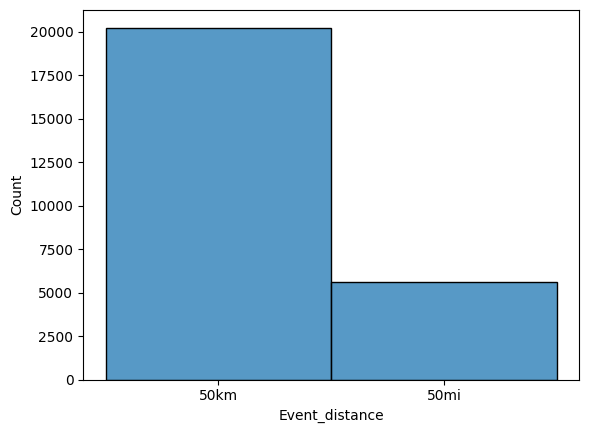

In [36]:
sns.histplot(df3['Event_distance'])

<Axes: xlabel='Event_distance', ylabel='Count'>

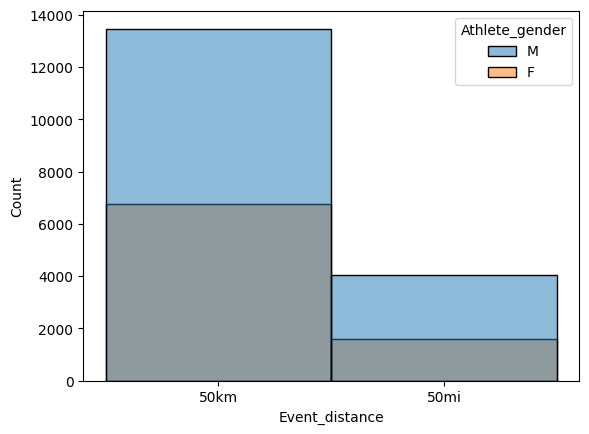

In [37]:
sns.histplot(df3, x='Event_distance', hue='Athlete_gender')

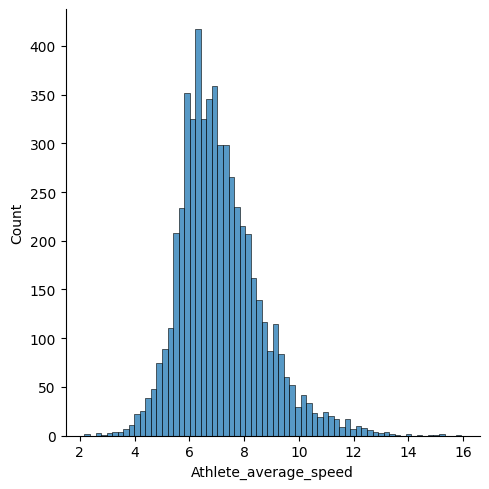

In [38]:
sns.displot(df3[df3['Event_distance'] == '50mi']['Athlete_average_speed'])

<Axes: xlabel='Event_distance', ylabel='Athlete_average_speed'>

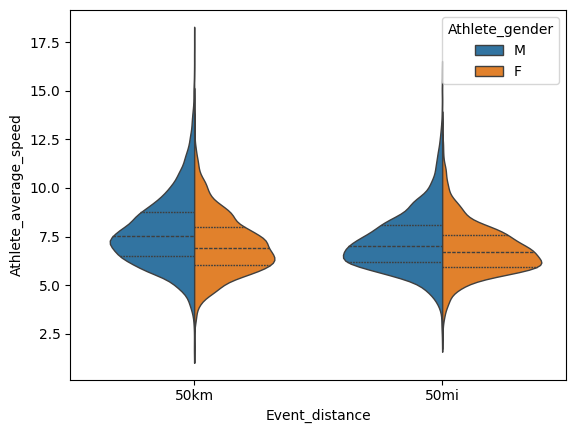

In [39]:
sns.violinplot(data = df3, x='Event_distance', y ='Athlete_average_speed', hue='Athlete_gender', split=True, inner= 'quartz',linewidth=1 )

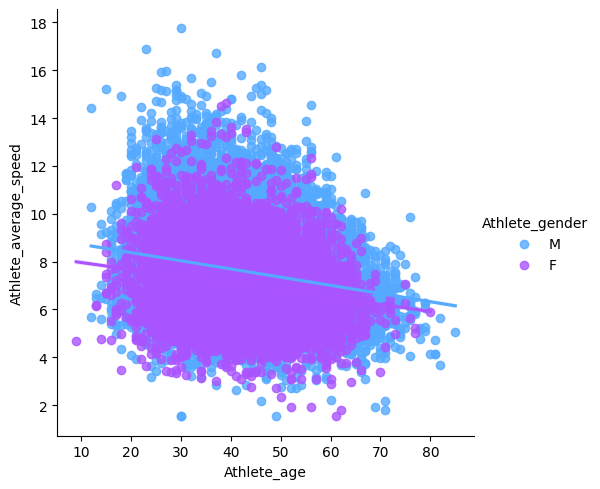

In [40]:
sns.lmplot(data = df3, x='Athlete_age', y='Athlete_average_speed', hue='Athlete_gender', palette='cool' )

#### _Questions I want to resolve about the data_

In [41]:
# 'Year_of_event',
# 'Event_dates',
# 'Event_name',
# 'Event_distance',
# 'Event_number_of_finishers', 
# 'Athlete_performance',
# 'Athlete_club',
# 'Athlete_country',
# 'Athlete_year_of_birth',
# 'Athlete_gender',
# 'Athlete_age',
# 'Athlete_average_speed',
# 'Athlete_ID'

- Difference in speed for the 50k, 50mi male to female

In [42]:
df3.groupby(['Event_distance', 'Athlete_gender'])['Athlete_average_speed'].mean()

Event_distance  Athlete_gender
50km            F                 7.083011
                M                 7.738985
50mi            F                 6.834371
                M                 7.257633
Name: Athlete_average_speed, dtype: float64

- What age groups are the **best** in the 50mi Race (20 + races min)

In [43]:
df3.query('Event_distance == "50mi"').groupby('Athlete_age')['Athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending=False).query('count>19')

,mean,count
Athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


- What age groups are the **worst** in the 50mi Race (20 + races min)

In [44]:
df3.query('Event_distance == "50mi"').groupby('Athlete_age')['Athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending=True).query('count>10')

,mean,count
Athlete_age,,
70,5.470667,12
65,5.934786,14
67,6.114909,11
60,6.261788,33
62,6.272730,37
61,6.358355,31
63,6.514806,31
58,6.582328,67
64,6.620727,22


- Which season athletes are slower?
    - spring 3-5
    - summer 6-8
    - fall 9-11
    - winter 12-2

In [45]:
df3['Race_month'] = df3['Event_dates'].str.split('.').str.get(1).astype(int)

C:\Users\Fernanda\AppData\Local\Temp\ipykernel_21484\1786604634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Race_month'] = df3['Event_dates'].str.split('.').str.get(1).astype(int)


In [46]:
#df3.head()

In [47]:
df3['Race_season'] = df3['Race_month'].apply(lambda x:'Winter' if x>11 else 'Fall' if x>8 else 'Summer' if x>5 else 'Spring' if x>2 else 'Winter')

C:\Users\Fernanda\AppData\Local\Temp\ipykernel_21484\731073605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Race_season'] = df3['Race_month'].apply(lambda x:'Winter' if x>11 else 'Fall' if x>8 else 'Summer' if x>5 else 'Spring' if x>2 else 'Winter')


In [48]:
df3.head()

,Event_dates,Event_name,Event_distance,Event_number_of_finishers,Athlete_ID,Athlete_gender,Athlete_age,Athlete_performance,Athlete_average_speed,Year_of_event,Race_month,Race_season
2539945,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,71287,M,29,3:17:55,15.158,2020,2,Winter
2539946,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,629508,M,39,4:02:32,12.369,2020,2,Winter
2539947,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,64838,M,21,4:07:57,12.099,2020,2,Winter
2539948,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,704450,M,37,4:22:02,11.449,2020,2,Winter
2539949,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,810281,M,43,4:27:34,11.212,2020,2,Winter


In [49]:
df3.groupby('Race_season')['Athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending= False)

,mean,count
Race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653


- 50mi only

In [50]:
df3.query('Event_distance == "50mi"').groupby('Race_season')['Athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending= False)

,mean,count
Race_season,,
Fall,7.511585,1997
Spring,7.082557,836
Winter,7.048442,1977
Summer,6.505776,817
